## EDA Loan defaulter

- Identify pattern on which client has difficulty paying their instalments
- company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [174]:
import warnings
warnings.filterwarnings("ignore")

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [176]:
#application data set
df_ad = pd.read_csv("application_data.csv")

In [177]:
df_ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [178]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [179]:
df_ad.shape

(307511, 122)

## Handling Missing Record

In [180]:
#collecting column with null %
null_col = df_ad.isna().sum()*100/df_ad.shape[0]

In [181]:
null_df = pd.DataFrame(list(zip(null_col.index, null_col.values)), columns=['Column Name', '% NULL'])

In [182]:
null_df[null_df['% NULL'] > 50].shape

(41, 2)

### 41 columns with more than 50% are null
- we can simply delete those column.

In [183]:
null_df_50 = null_df[null_df['% NULL'] > 50]

In [184]:
null_df_50.head()

,Column Name,% NULL
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
47,YEARS_BUILD_AVG,66.497784


In [185]:
# Dropping all columns with 50% data missing
for col in null_df_50['Column Name']:
    df_ad.drop(col, axis=1, inplace=True)

In [186]:
# final shape after deletion, 122- 41
df_ad.shape

(307511, 81)

In [187]:
# removing column information from temporary df with null value information
null_df = null_df[null_df['% NULL'] <= 50]

In [188]:
# After removing 50% missing value, we still see a lot data missing
#shows distribution of missing value %

bins = [-0.5, 0.0,0.5,1.0,2.0,3.0,5.0,10.0, 20.0, 100.0,float('inf')]
labels = ['-1.0','0.0','0.5','1.0','2.0','3.0','5.0','10.0', '20.0', '100.0']
null_df['% NULL Group'] = pd.cut(null_df['% NULL'], bins, labels)

<AxesSubplot:xlabel='% NULL', ylabel='Density'>

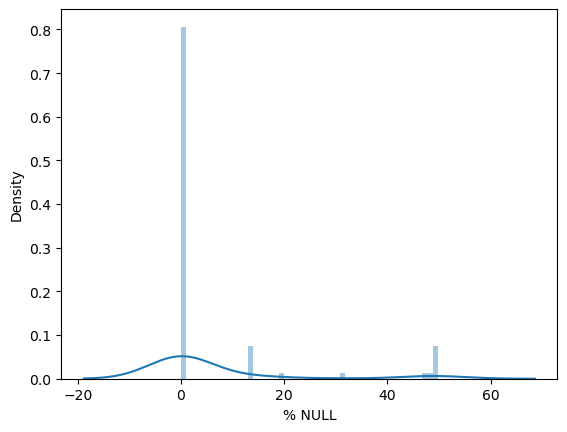

In [189]:
sns.distplot(null_df['% NULL'])

### most rows 0 - 0.5% missing data

There are few ranging from 10% to 50%. Let's find out what % data are missing at highest.

In [190]:
null_df.groupby(by='% NULL Group').median()

,% NULL
% NULL Group,
"(-0.5, 0.0]",0.000000
"(0.0, 0.5]",0.273324
"(0.5, 1.0]",NaN
"(1.0, 2.0]",NaN
"(2.0, 3.0]",NaN
"(3.0, 5.0]",NaN
"(5.0, 10.0]",NaN
"(10.0, 20.0]",13.501631
"(20.0, 100.0]",48.781019


In [191]:
# taking 13% as cut off on missing value. Columns with less than 13% will consider for further analysis. Imputing with median or Mode or outlier with capping 
null_df[null_df['% NULL'] <= 13]['Column Name'].count()

65

In [192]:
final_cols = list(null_df[null_df['% NULL'] <= 13]['Column Name'])

In [193]:
null_df[null_df['% NULL'] == 0.0].shape

(55, 3)

In [194]:
null_df[(null_df['% NULL'] > 0.0) & (null_df['% NULL'] <= .5)]

,Column Name,% NULL,% NULL Group
9,AMT_ANNUITY,0.003902,"(0.0, 0.5]"
10,AMT_GOODS_PRICE,0.090403,"(0.0, 0.5]"
11,NAME_TYPE_SUITE,0.420148,"(0.0, 0.5]"
29,CNT_FAM_MEMBERS,0.000650,"(0.0, 0.5]"
42,EXT_SOURCE_2,0.214626,"(0.0, 0.5]"
91,OBS_30_CNT_SOCIAL_CIRCLE,0.332021,"(0.0, 0.5]"
92,DEF_30_CNT_SOCIAL_CIRCLE,0.332021,"(0.0, 0.5]"
93,OBS_60_CNT_SOCIAL_CIRCLE,0.332021,"(0.0, 0.5]"
94,DEF_60_CNT_SOCIAL_CIRCLE,0.332021,"(0.0, 0.5]"
95,DAYS_LAST_PHONE_CHANGE,0.000325,"(0.0, 0.5]"


### Only 10 columns with missing value 0.0 to 0.5, Analysis on missing data
- MCAR data need to be left out from analysis
- MAR data need a relation for missing

In [195]:
columns = null_df[(null_df['% NULL'] > 0.0) & (null_df['% NULL'] <= .5)]['Column Name']
for col in columns:
    print(col, df_ad[col].dtype)

AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
CNT_FAM_MEMBERS float64
EXT_SOURCE_2 float64
OBS_30_CNT_SOCIAL_CIRCLE float64
DEF_30_CNT_SOCIAL_CIRCLE float64
OBS_60_CNT_SOCIAL_CIRCLE float64
DEF_60_CNT_SOCIAL_CIRCLE float64
DAYS_LAST_PHONE_CHANGE float64


### AMT_ANNUITY

### missing value treatment

In [196]:
df_ad.AMT_ANNUITY.describe() #Looks like there is outlier as max is way higher than p75 quartile

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### We can't replace missing value with any random value. better leave missing record from our analysis, This is MCAR data. 


### missing Value analysis : AMT_GOODS_PRICE

AMT_GOODS_PRICE is some random missing value, can't be deduce from any other data better to ignore these data

In [197]:
df_ad = df_ad[~df_ad.AMT_GOODS_PRICE.isna()]

### missing Value analysis : NAME_TYPE_SUITE

In [198]:
df_ad.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [199]:
suite_mode = df_ad.NAME_TYPE_SUITE.mode()[0]
suite_mode

'Unaccompanied'

**Most data are 'Unaccompanied', categorical data can be filled with mode and 81% are 'Unaccompanied'.**

In [200]:
df_ad.NAME_TYPE_SUITE.fillna(suite_mode, inplace=True)

In [201]:
df_ad.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.812217
Family             0.130679
Spouse, partner    0.037008
Children           0.010634
Other_B            0.005761
Other_A            0.002819
Group of people    0.000882
Name: NAME_TYPE_SUITE, dtype: float64

### missing Value analysis : CNT_FAM_MEMBERS

In [202]:
#while treating other missing value CNT_FAM_MEMBERS column has no missing value
df_ad.CNT_FAM_MEMBERS.isna().sum()

0

### missing Value analysis : CNT_FAM_MEMBERS

In [203]:
# external source could be intentional miss (MCAR)
# There is no pattern on missing this data. Better to leave out these data on our analysis
df_ad.EXT_SOURCE_2.isna().sum()

659

In [204]:
df_ad.EXT_SOURCE_2.describe()

count    3.065740e+05
mean     5.143934e-01
std      1.910700e-01
min      8.173617e-08
25%      3.924431e-01
50%      5.659722e-01
75%      6.636305e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

## Fixing Invalid Values

#### DAYS_EMPLOYED
days of employment can't be negative

In [205]:
df_ad.DAYS_EMPLOYED = df_ad.DAYS_EMPLOYED.apply(lambda x: abs(x))

#### DAYS_BIRTH
days of birth can't be negative

In [206]:
df_ad.DAYS_BIRTH = df_ad.DAYS_BIRTH.apply(lambda x: abs(x))

#### DAYS_REGISTRATION

In [207]:
df_ad.DAYS_REGISTRATION = df_ad.DAYS_REGISTRATION.apply(lambda x: abs(x))

#### DAYS_ID_PUBLISH


In [208]:
df_ad.DAYS_ID_PUBLISH = df_ad.DAYS_ID_PUBLISH.apply(lambda x: abs(x))

### No Data type change is required.
all column are assigned with right data type.

In [209]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307233 non-null  int64  
 1   TARGET                        307233 non-null  int64  
 2   NAME_CONTRACT_TYPE            307233 non-null  object 
 3   CODE_GENDER                   307233 non-null  object 
 4   FLAG_OWN_CAR                  307233 non-null  object 
 5   FLAG_OWN_REALTY               307233 non-null  object 
 6   CNT_CHILDREN                  307233 non-null  int64  
 7   AMT_INCOME_TOTAL              307233 non-null  float64
 8   AMT_CREDIT                    307233 non-null  float64
 9   AMT_ANNUITY                   307221 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               307233 non-null  object 
 12  NAME_INCOME_TYPE              307233 non-nul

### Outlier value treament
#### AMT_ANNUIT

In [210]:
df_ad.AMT_ANNUITY.describe()

count    307221.000000
mean      27120.452357
std       14492.106811
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

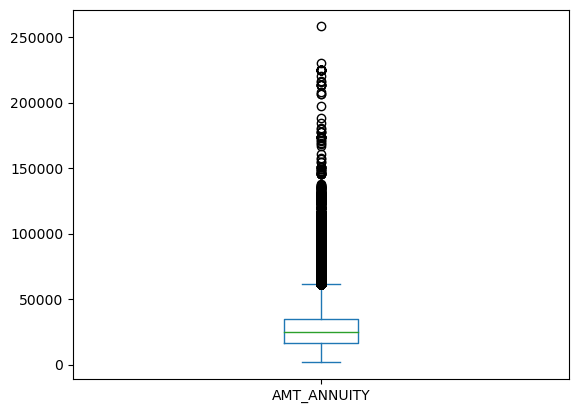

In [211]:
df_ad.AMT_ANNUITY.plot.box()

In [212]:
p75 = df_ad.AMT_ANNUITY.quantile([.75]).values[0]
p25 = df_ad.AMT_ANNUITY.quantile([.25]).values[0]
p75 + 1.5*(p75-p25)

61663.5

In [213]:
percentile = df_ad.AMT_ANNUITY.quantile([0.01, 0.05, .90, 0.95, 0.99])
percentile

0.01     6178.5
0.05     9000.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

#### We can't add cap to quantile data. adding cap might not draw correct picture for high annuity, better ignore. High anuity might be impacting other column decision.
#### df_ad.AMT_ANNUITY[df_ad.AMT_ANNUITY > 70006.50] = 70006.50


<AxesSubplot:>

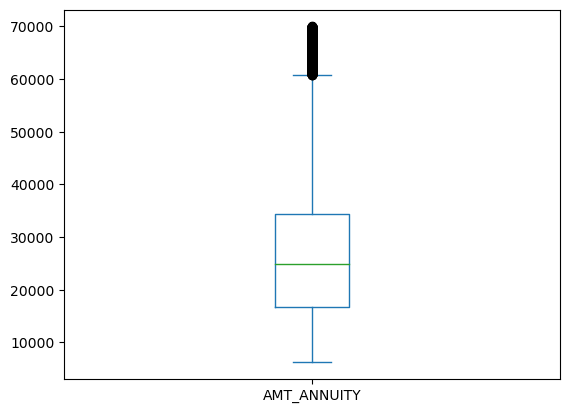

In [214]:
df_ad.AMT_ANNUITY[(df_ad.AMT_ANNUITY > percentile.values[0]) & (df_ad.AMT_ANNUITY < percentile.values[-1])].plot.box()

In [215]:
# Better to ignore > .99 percentile and < .01 percentile
df_ad = df_ad[(df_ad.AMT_ANNUITY > percentile.values[0]) & (df_ad.AMT_ANNUITY < percentile.values[-1])]

In [216]:
df_ad.shape

(301065, 81)

#### AMT_INCOME_TOTAL

<AxesSubplot:>

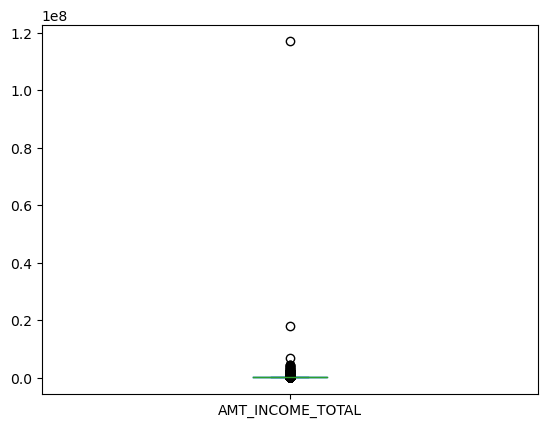

In [217]:
df_ad.AMT_INCOME_TOTAL.plot.box()

In [218]:
percentile = df_ad.AMT_INCOME_TOTAL.quantile([0.01, 0.1, .90, 0.95, 0.99])
percentile

0.01     45000.0
0.10     81000.0
0.90    270000.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [219]:
df_ad.AMT_INCOME_TOTAL.describe()

count    3.010650e+05
mean     1.676216e+05
std      2.359181e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Trimming out Higher income bracket data or capping might misjudge out analysis better to keep as it is. This is not affecting our defaulter analysis

In [220]:
#df_ad = df_ad[ (df_ad.AMT_INCOME_TOTAL < percentile.values[-1]) | (df_ad.AMT_INCOME_TOTAL > percentile.values[0])]

<AxesSubplot:>

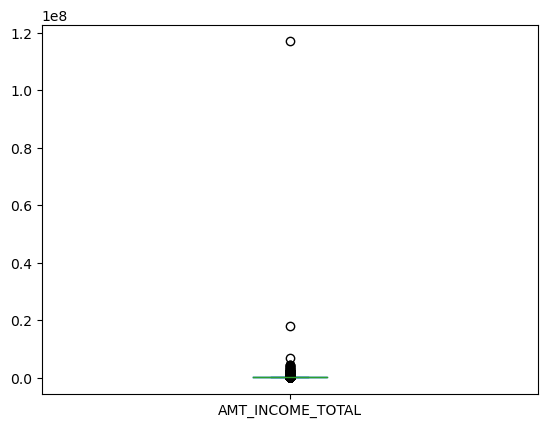

In [221]:
df_ad.AMT_INCOME_TOTAL.plot.box()

### AMT_CREDIT

<AxesSubplot:>

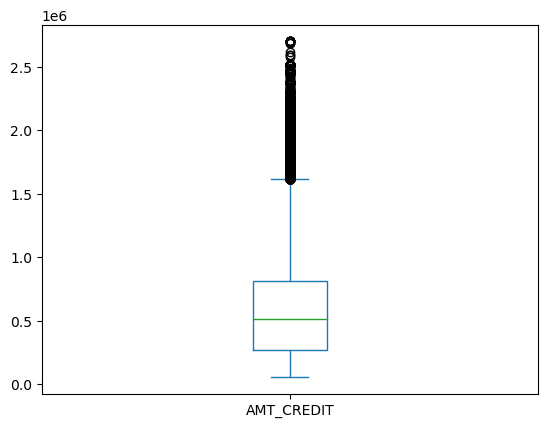

In [222]:
df_ad.AMT_CREDIT.plot.box()

In [223]:
percentile = df_ad.AMT_CREDIT.quantile([0.5, 0.70, .90, 0.95, 0.99])
percentile

0.50     514602.0
0.70     752116.5
0.90    1125000.0
0.95    1345500.0
0.99    1800000.0
Name: AMT_CREDIT, dtype: float64

In [224]:
df_ad.AMT_CREDIT.describe()

count    3.010650e+05
mean     5.963340e+05
std      3.900214e+05
min      5.212800e+04
25%      2.710665e+05
50%      5.146020e+05
75%      8.086500e+05
max      2.700000e+06
Name: AMT_CREDIT, dtype: float64

In [225]:
p75 = df_ad.AMT_CREDIT.quantile([.75]).values[0]
p25 = df_ad.AMT_CREDIT.quantile([.25]).values[0]
p75 + 1.5*(p75-p25)

1615025.25

#### Outlier can be capped at 99 percentile

In [226]:
#df_ad.AMT_CREDIT[ df_ad.AMT_CREDIT < percentile.values[0]] = percentile.values[0]
#df_ad.AMT_CREDIT[ df_ad.AMT_CREDIT > percentile.values[-1]] = percentile.values[-1]

<AxesSubplot:>

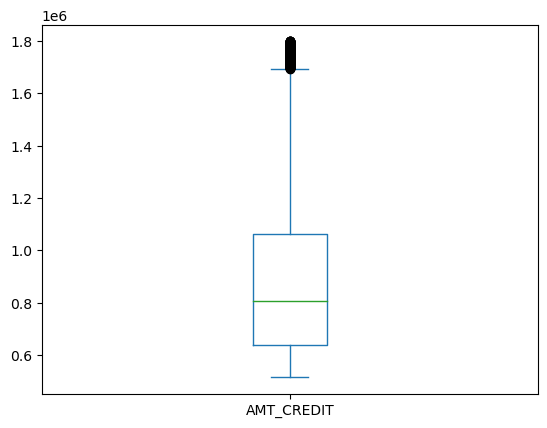

In [227]:
df_ad.AMT_CREDIT[ (df_ad.AMT_CREDIT > percentile.values[0]) & (df_ad.AMT_CREDIT < percentile.values[-1])].plot.box()

### REGION_POPULATION_RELATIVE

<AxesSubplot:>

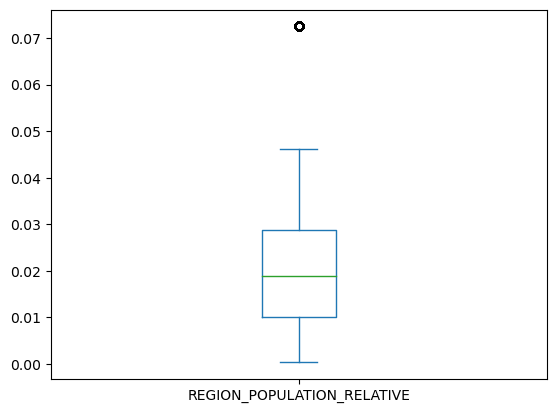

In [228]:
df_ad.REGION_POPULATION_RELATIVE.plot.box()

In [229]:
df_ad.REGION_POPULATION_RELATIVE.describe()

count    301065.000000
mean          0.020807
std           0.013743
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [230]:
p75 = df_ad.REGION_POPULATION_RELATIVE.quantile([.75]).values[0]
p25 = df_ad.REGION_POPULATION_RELATIVE.quantile([.25]).values[0]
p75 + 1.5*(p75-p25)

0.056648500000000004

In [231]:
# There is just one outlier better to remove
df_ad = df_ad[df_ad.REGION_POPULATION_RELATIVE < p75 + 1.5*(p75-p25)]

<AxesSubplot:>

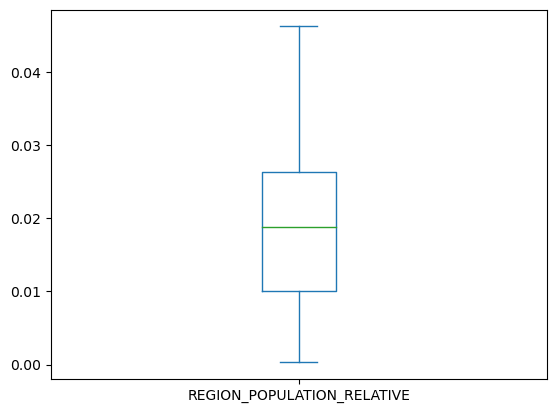

In [232]:
df_ad.REGION_POPULATION_RELATIVE.plot.box()

### DAYS_EMPLOYED

<AxesSubplot:>

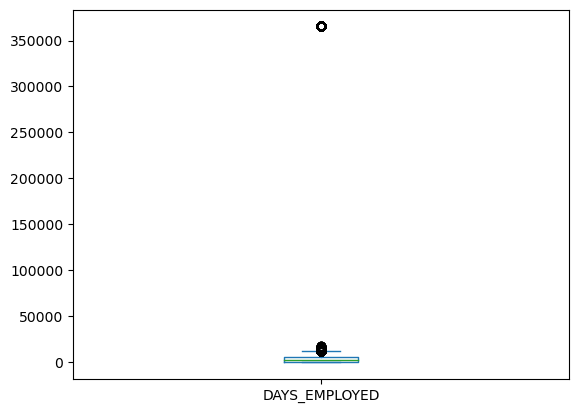

In [233]:
df_ad.DAYS_EMPLOYED.plot.box()

In [234]:
df_ad.DAYS_EMPLOYED.describe()

count    293083.000000
mean      67128.523367
std      138946.329398
min           0.000000
25%         929.000000
50%        2208.000000
75%        5647.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [235]:
percentile = df_ad.DAYS_EMPLOYED.quantile([0.81, 0.82, 0.85, .90, 0.95, 0.99])
percentile.values

array([ 10600.  ,  13835.24, 365243.  , 365243.  , 365243.  , 365243.  ])

<AxesSubplot:>

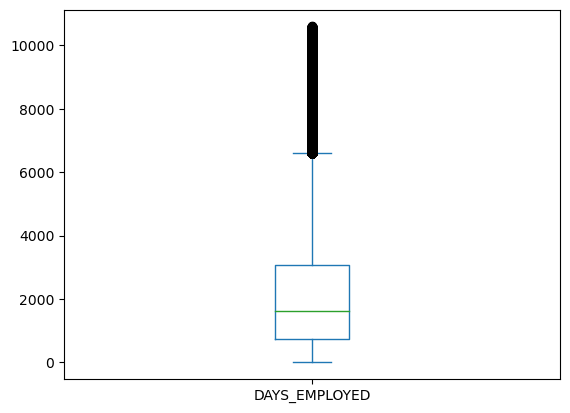

In [236]:
df_ad[df_ad.DAYS_EMPLOYED < percentile.values[0]].DAYS_EMPLOYED.plot.box()

#### 85 percentile data employed for 365243. which add upto the mean and median value. We can't just delete those data.

In [237]:
#Converting days employed to years employed
df_ad['YEAR_EMPLOYED'] = df_ad.DAYS_EMPLOYED.apply(lambda x: x//365)

<AxesSubplot:>

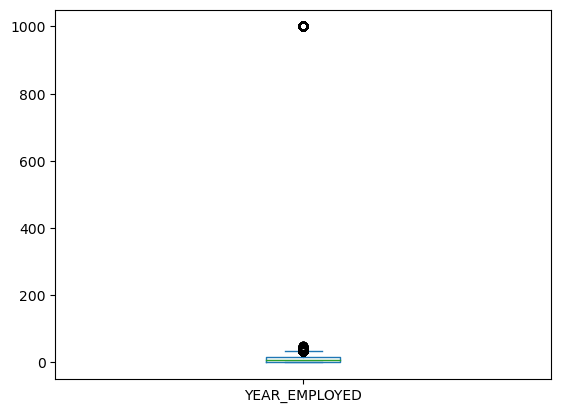

In [238]:
df_ad['YEAR_EMPLOYED'].plot.box()

In [239]:
df_ad['YEAR_EMPLOYED'].describe()

count    293083.000000
mean        183.388047
std         380.609755
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEAR_EMPLOYED, dtype: float64

In [240]:
# None would be employed 1000 year. 

In [241]:
percentile = df_ad.YEAR_EMPLOYED.quantile([0.81, 0.82, 0.85, .90, 0.95, 0.99])
percentile.values

array([  29.,   37., 1000., 1000., 1000., 1000.])

In [242]:
# can't cap to 83 percentile data data
df_ad[df_ad.YEAR_EMPLOYED > 37].DAYS_BIRTH.describe()

count    52745.000000
mean     21821.286530
std       1987.487156
min       7691.000000
25%      20855.000000
50%      22052.000000
75%      23169.000000
max      25201.000000
Name: DAYS_BIRTH, dtype: float64

In [243]:
#Better to replace YEAR_EMPLOYED with median value


In [244]:
df_ad.YEAR_EMPLOYED.replace(1000,6, inplace=True)

<AxesSubplot:>

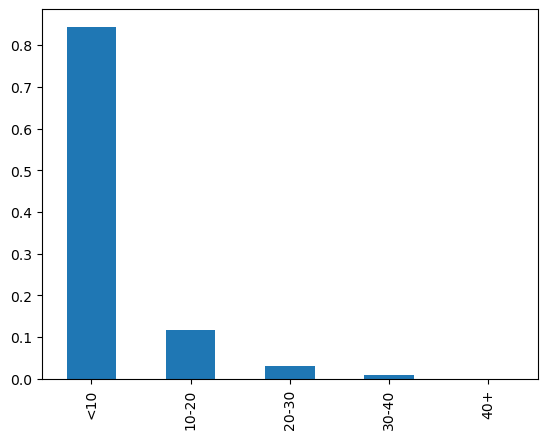

In [245]:
df_ad["YEAR_EMPLOYED_GROUP"]=pd.cut(df_ad.YEAR_EMPLOYED,[0, 10, 20, 30, 40, 100], labels= ["<10","10-20","20-30","30-40", "40+"])
df_ad.YEAR_EMPLOYED_GROUP.value_counts(normalize=True).plot.bar()

### Age Group analysis

In [246]:
# add age column
df_ad['AGE'] = df_ad.DAYS_BIRTH.apply(lambda x: x//365)

In [247]:
df_ad["AGE_GROUP"]=pd.cut(df_ad.AGE,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])
df_ad.AGE_GROUP.value_counts(normalize= True)

30-40    0.270841
40-50    0.241819
50-60    0.219620
<30      0.173200
60+      0.094519
Name: AGE_GROUP, dtype: float64

<AxesSubplot:>

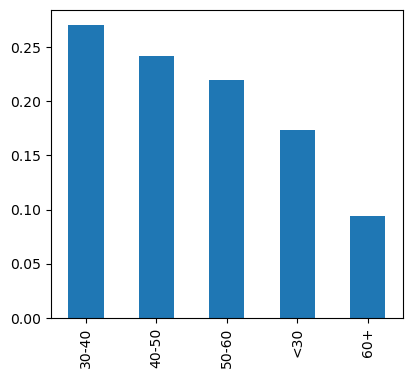

In [248]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
df_ad.AGE_GROUP.value_counts(normalize= True).plot.bar()

In [249]:
df_ad["INCOME_GROUP"]=pd.cut(df_ad.AMT_INCOME_TOTAL,[50000, 100000, 150000, 200000, 250000, 1000000000], labels= ["L","A","AA","H", "R"])
df_ad.INCOME_GROUP.value_counts(normalize= True)

A     0.310615
AA    0.215891
L     0.198406
H     0.157528
R     0.117560
Name: INCOME_GROUP, dtype: float64

# Analysis On Target

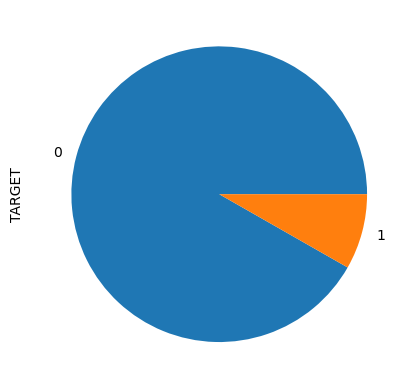

In [250]:
df_ad.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

In [251]:
df_ad.TARGET.value_counts(normalize=True)

0    0.917494
1    0.082506
Name: TARGET, dtype: float64

#### it shows only few are defaulter

## Defaulter vs Non-Defaulter

In [252]:
defaulter = df_ad[df_ad.TARGET == 1]

In [253]:
non_defaulter = df_ad[df_ad.TARGET == 0]

## Univariate Analysis on both Defaulter and non defaulter Dataset

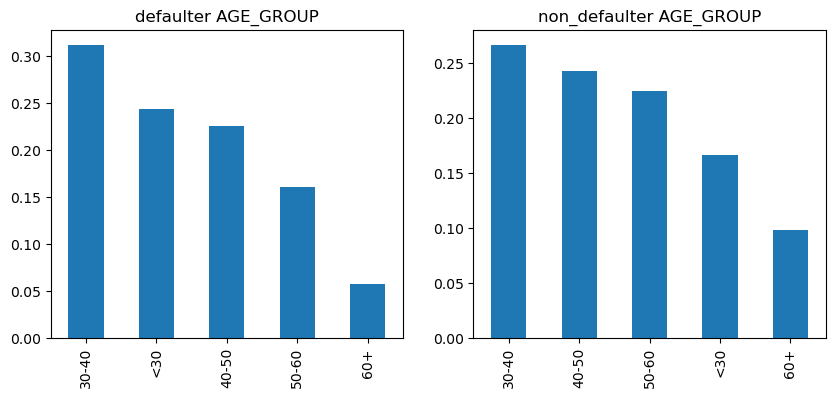

In [254]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.AGE_GROUP.value_counts(normalize= True).plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.AGE_GROUP.value_counts(normalize= True).plot.bar()
ax1.title.set_text('defaulter AGE_GROUP')
ax2.title.set_text('non_defaulter AGE_GROUP')
plt.show()

#### - as there more people around 30-40, it is in highest % in both category, deaulter and non-defaulter
#### - But population under 30 is less ,  defaulter is at highest

In [255]:
df_ad.AGE_GROUP.value_counts(normalize=True)

30-40    0.270841
40-50    0.241819
50-60    0.219620
<30      0.173200
60+      0.094519
Name: AGE_GROUP, dtype: float64

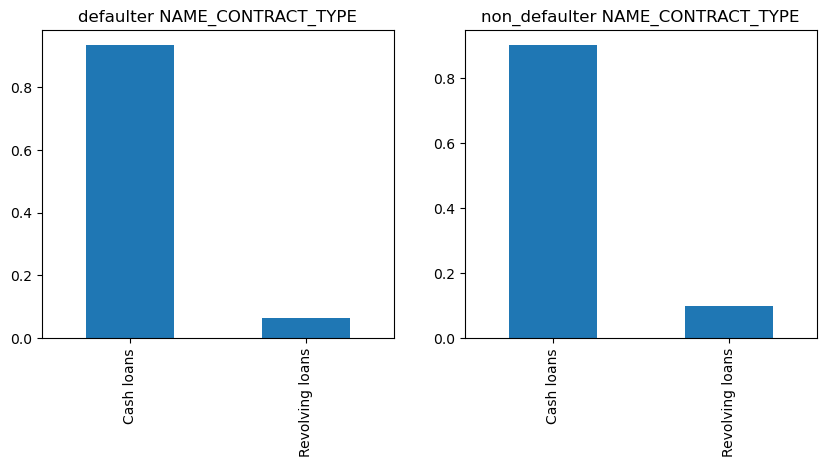

In [256]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.bar()
ax1.title.set_text('defaulter NAME_CONTRACT_TYPE')
ax2.title.set_text('non_defaulter NAME_CONTRACT_TYPE')
plt.show()

#### age_group VS income

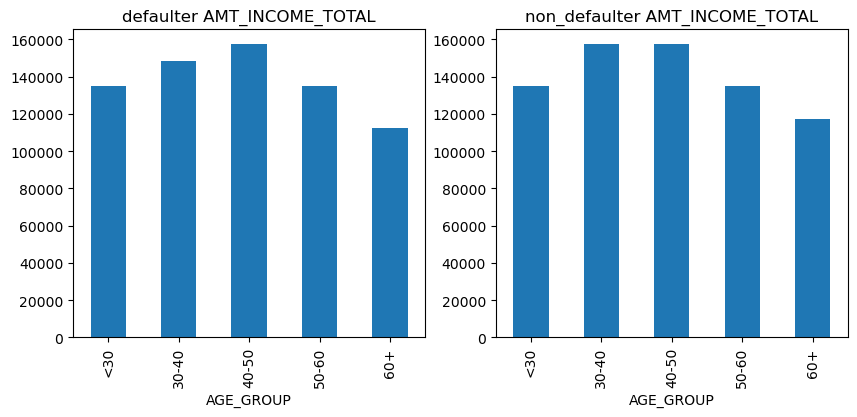

In [257]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].median().plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].median().plot.bar()
ax1.title.set_text('defaulter AMT_INCOME_TOTAL')
ax2.title.set_text('non_defaulter AMT_INCOME_TOTAL')
plt.show()

#### NAME_INCOME_TYPE vs AMT_INCOME_TOTAL


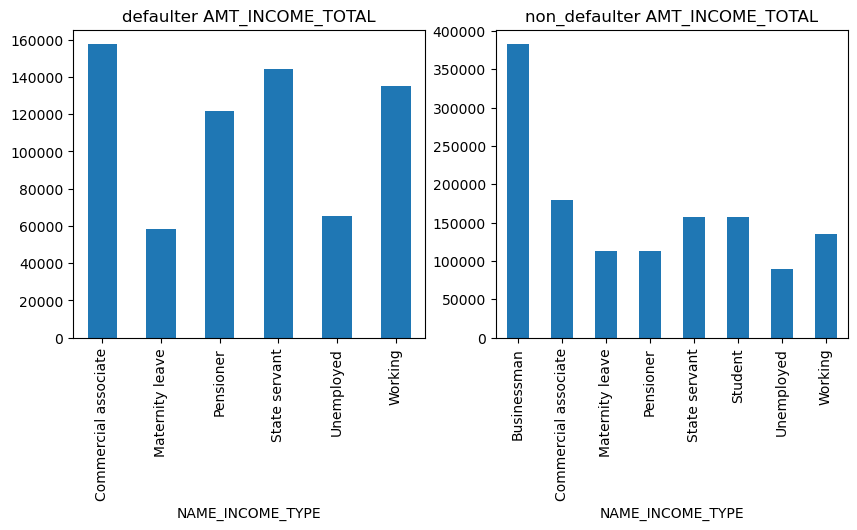

In [258]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].median().plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].median().plot.bar()
ax1.title.set_text('defaulter AMT_INCOME_TOTAL')
ax2.title.set_text('non_defaulter AMT_INCOME_TOTAL')
plt.show()

### Business man are not Defaulter

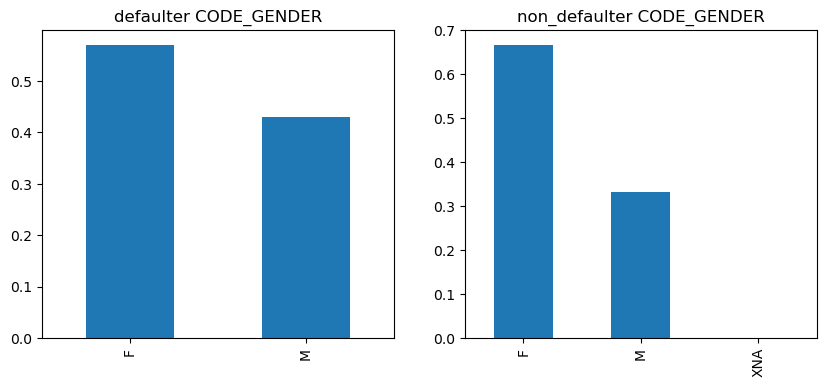

In [259]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.CODE_GENDER.value_counts(normalize=True).plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.CODE_GENDER.value_counts(normalize=True).plot.bar()
ax1.title.set_text('defaulter CODE_GENDER')
ax2.title.set_text('non_defaulter CODE_GENDER')
plt.show()

In [260]:
df_ad.CODE_GENDER.value_counts()

F      193274
M       99805
XNA         4
Name: CODE_GENDER, dtype: int64

### not much to deduce from above, higher female number leads higher %.

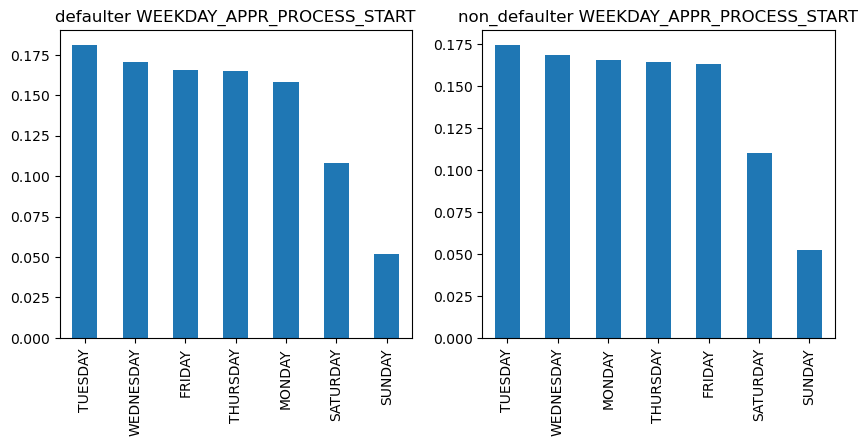

In [261]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
ax1.title.set_text('defaulter WEEKDAY_APPR_PROCESS_START')
ax2.title.set_text('non_defaulter WEEKDAY_APPR_PROCESS_START')
plt.show()

In [262]:
df_ad.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      51417
WEDNESDAY    49470
MONDAY       48339
THURSDAY     48249
FRIDAY       47991
SATURDAY     32292
SUNDAY       15325
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

#### saturday, sunday are holiday. There are nearly 5% customer processed on Sunday !! 
Saturday could be working.

#### INCOME_GROUP TYPE vs AMT_ANNUITY

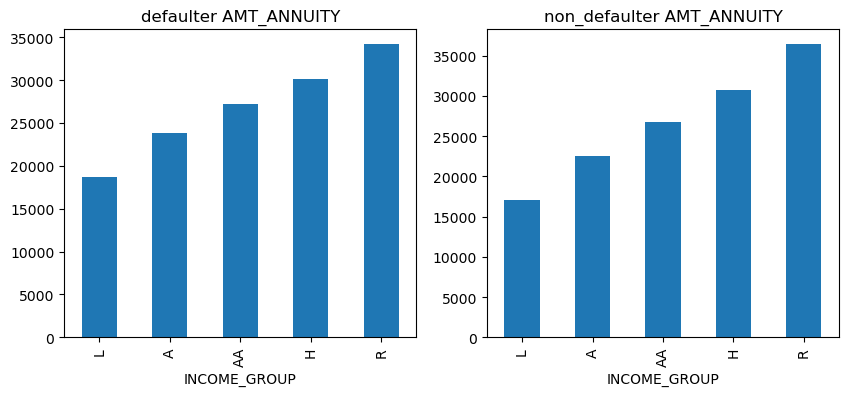

In [263]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.groupby('INCOME_GROUP')['AMT_ANNUITY'].median().plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.groupby('INCOME_GROUP')['AMT_ANNUITY'].median().plot.bar()
ax1.title.set_text('defaulter AMT_ANNUITY')
ax2.title.set_text('non_defaulter AMT_ANNUITY')
plt.show()

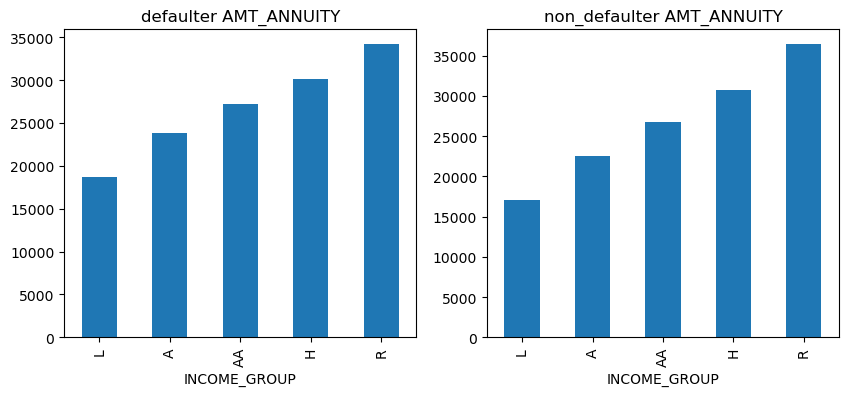

In [264]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
defaulter.groupby('INCOME_GROUP')['AMT_ANNUITY'].median().plot.bar()
ax2 = fig.add_subplot(122)
non_defaulter.groupby('INCOME_GROUP')['AMT_ANNUITY'].median().plot.bar()
ax1.title.set_text('defaulter AMT_ANNUITY')
ax2.title.set_text('non_defaulter AMT_ANNUITY')
plt.show()

## Correlation between numerical column

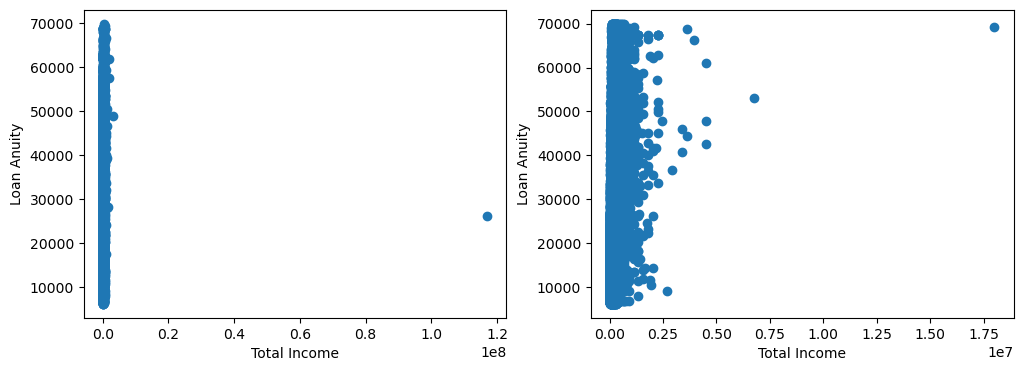

In [265]:
fig = plt.figure(figsize=[12,4])
ax1  = fig.add_subplot(121)
plt.scatter(defaulter.AMT_INCOME_TOTAL, defaulter.AMT_ANNUITY)
plt.xlabel("Total Income")
plt.ylabel("Loan Anuity")
ax2 = fig.add_subplot(122)
plt.scatter(non_defaulter.AMT_INCOME_TOTAL, non_defaulter.AMT_ANNUITY)

plt.xlabel("Total Income")
plt.ylabel("Loan Anuity")
plt.show()

### A higher anuity is being paid to lower income group
This was not evident on bar plot but we can see even higher anuity paid to lower income group could be reason for defaulter
<br/><br/>
<br/><br/>


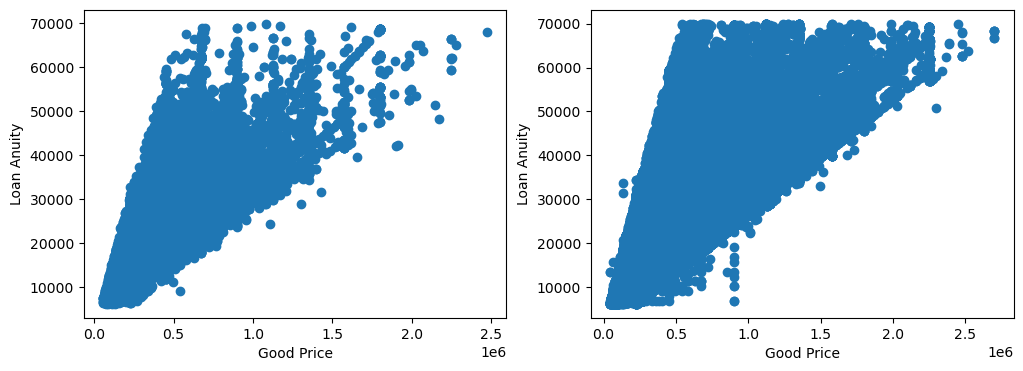

In [266]:
fig = plt.figure(figsize=[12,4])
ax1  = fig.add_subplot(121)
plt.scatter(defaulter.AMT_GOODS_PRICE, defaulter.AMT_ANNUITY)
plt.xlabel("Good Price")
plt.ylabel("Loan Anuity")
ax2 = fig.add_subplot(122)
plt.scatter(non_defaulter.AMT_GOODS_PRICE, non_defaulter.AMT_ANNUITY)
plt.xlabel("Good Price")
plt.ylabel("Loan Anuity")
plt.show()

### Higher the Good Price higher the anuity
<br/><br/>

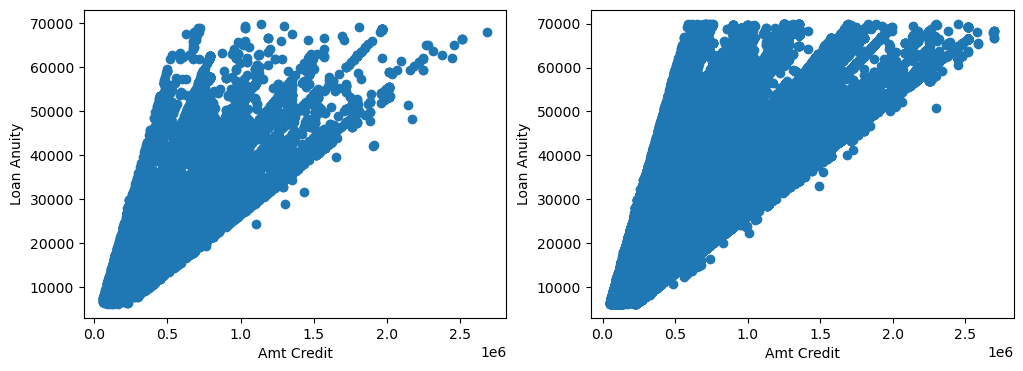

In [267]:
fig = plt.figure(figsize=[12,4])
ax1  = fig.add_subplot(121)
plt.scatter(defaulter.AMT_CREDIT, defaulter.AMT_ANNUITY)
plt.xlabel("Amt Credit")
plt.ylabel("Loan Anuity")
ax2 = fig.add_subplot(122)
plt.scatter(non_defaulter.AMT_CREDIT, non_defaulter.AMT_ANNUITY)

plt.xlabel("Amt Credit")
plt.ylabel("Loan Anuity")
plt.show()

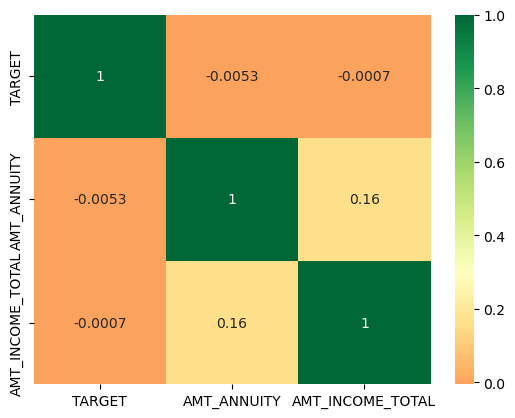

In [268]:
sns.heatmap(df_ad[['TARGET', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']].corr(), annot= True, cmap= "RdYlGn", center=.3)
plt.show()

#### There is +ve relation between Income, and anuity but there is negative relation between target vs anuity and income
- higher the income lower the defaulter
- higher the anuity lower the defaulter

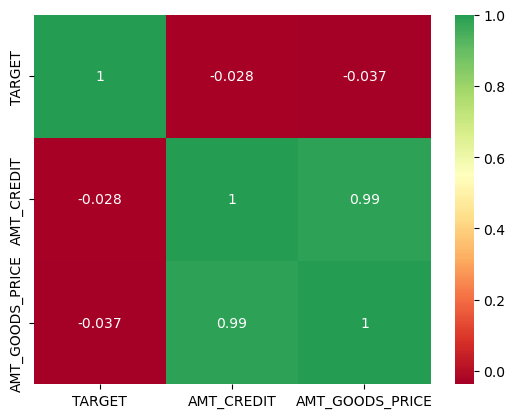

In [269]:
sns.heatmap(df_ad[['TARGET', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].corr(), annot= True, cmap= "RdYlGn", center=.55)
plt.show()

#### There is +ve relation between AMT_CREDIT, and AMT_GOODS_PRICE but there is negative relation between target vs AMT_GOODS_PRICE and AMT_CREDIT
- higher AMT_CREDIT lower the defaulter
- higher AMT_GOODS_PRICE lower the defaulter

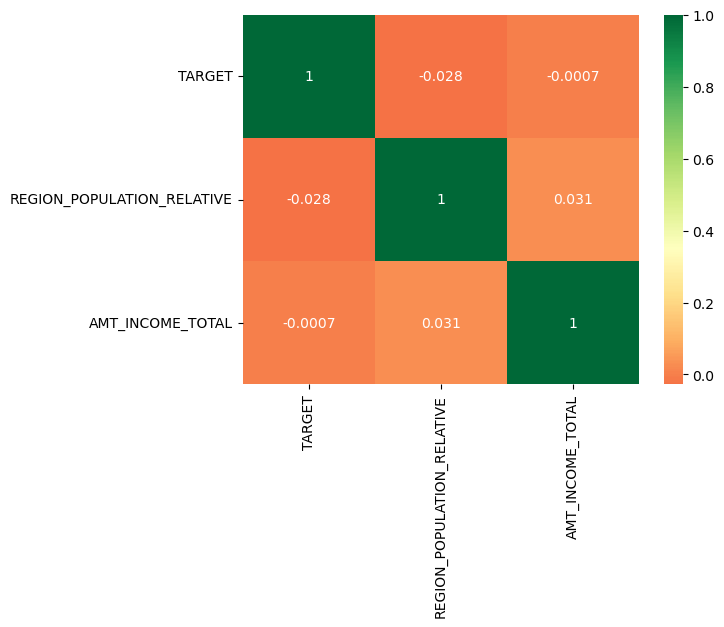

In [270]:
sns.heatmap(df_ad[['TARGET', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL']].corr(), annot= True, cmap= "RdYlGn", center=.35)
plt.show()

- Highly polulated region must be among with city, where it has less defaulter.
- Highly populated regio are high earning place
<br></br>

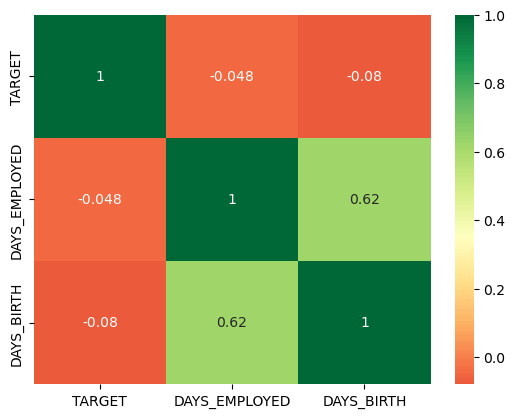

In [271]:
sns.heatmap(df_ad[['TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']].corr(), annot= True, cmap= "RdYlGn", center=.35)
plt.show()

- elder person with more work experience are tends to default less
<br></br>

# Previous Application Data Set

In [272]:
#application data set
df_prev_ds = pd.read_csv("previous_application.csv")

In [273]:
df_prev_ds.shape

(1670214, 37)

In [274]:
prev_col = df_prev_ds.isna().sum()*100/df_prev_ds.shape[0]

In [275]:
prev_null_df = pd.DataFrame(list(zip(prev_col.index, prev_col.values)), columns=['Column Name', '% NULL'])

In [276]:
prev_null_40 = prev_null_df[prev_null_df['% NULL'] > 49]
prev_null_40

,Column Name,% NULL
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754


In [277]:
# Dropping all columns with 50% data missing
for col in prev_null_40['Column Name']:
    df_prev_ds.drop(col, axis=1, inplace=True)

In [278]:
df_prev_ds.shape

(1670214, 32)

In [279]:
df_prev_ds.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [280]:
prev_col = df_prev_ds.isna().sum()*100/df_prev_ds.shape[0]

In [281]:
prev_col

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

## Missing value treatment

In [282]:
df_prev_ds.PRODUCT_COMBINATION.value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [283]:
df_prev_ds.PRODUCT_COMBINATION.mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

#### filling categorical variable with mode

In [284]:
df_prev_ds.fillna(df_prev_ds.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [285]:
df_prev_ds.PRODUCT_COMBINATION.value_counts(normalize=True)

Cash                              0.171437
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

#### other missing value are more than 20% better to not include them analysis,

In [286]:
df_prev_ds.AMT_CREDIT.dtype # data type suppose to float but it shows object

dtype('O')

In [287]:
df_prev_ds[df_prev_ds.AMT_CREDIT.apply(lambda x:  isinstance(x,float)) != True]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1127152,2204450,438387,Revolving loans,0.0,0.0,Cash,Cash,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street,Cash,Cash,Cash,Cash,Cash,Cash


#### Remove Cash from AMT_CREDIT

In [288]:
# data type suppose to float but it shows object
df_prev_ds = df_prev_ds[df_prev_ds.AMT_CREDIT.apply(lambda x:  isinstance(x,float)) == True]
df_prev_ds.shape

(1670213, 32)

#### AMT_GOODS_PRICE

In [289]:
# data type suppose to float but it shows object
df_prev_ds[df_prev_ds.AMT_GOODS_PRICE.apply(lambda x:  isinstance(x,float)) != True].shape[0]/df_prev_ds.shape[0]

0.23081726701923647

#### Invalid values that provide no information regarding true value, better to treat them as missing value
missing value is nearly 23%. better to leave it as it is

In [290]:
df_prev_ds[df_prev_ds.AMT_ANNUITY.apply(lambda x:  isinstance(x,float)) != True].shape[0]/df_prev_ds.shape[0]

0.22286678405688376

In [291]:
df_prev_ds[df_prev_ds.AMT_ANNUITY.apply(lambda x:  isinstance(x,float)) != True].shape[0]/df_prev_ds.shape[0]

0.22286678405688376

#### Invalid values that provide no information regarding true value, better to treat them as missing value

missing value is nearly 22%. better to leave it as it is


### Correcting Invalid Data

#### DAYS_DECISION

In [292]:
#correcting negative value
df_prev_ds.DAYS_DECISION = df_prev_ds.DAYS_DECISION.apply(lambda x: abs(x))

#### DAYS_FIRST_DUE


In [293]:
#correcting negative value
df_prev_ds.DAYS_FIRST_DUE.fillna(0, inplace=True)
df_prev_ds[df_prev_ds.DAYS_FIRST_DUE == 'Cash'].DAYS_FIRST_DUE.shape[0]/df_prev_ds.shape[0]

0.4029809371619069

#### nearly 40% data entered wrong, better to leave as it. Not to include in our analysis

In [294]:
df_prev_ds.DAYS_LAST_DUE.fillna(0, inplace=True)
df_prev_ds[df_prev_ds.DAYS_LAST_DUE == 'Cash'].DAYS_LAST_DUE.shape[0]/df_prev_ds.shape[0]

0.4029809371619069

#### nearly 40% data entered wrong, better to leave as it.

### Handling Outlier in Previous Application

<AxesSubplot:>

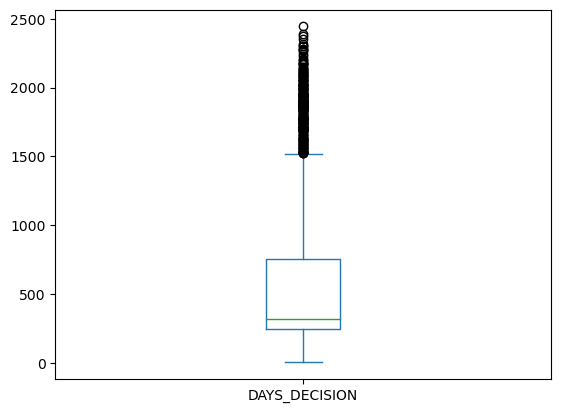

In [295]:
df_prev_ds.DAYS_DECISION.value_counts().plot.box()

<AxesSubplot:>

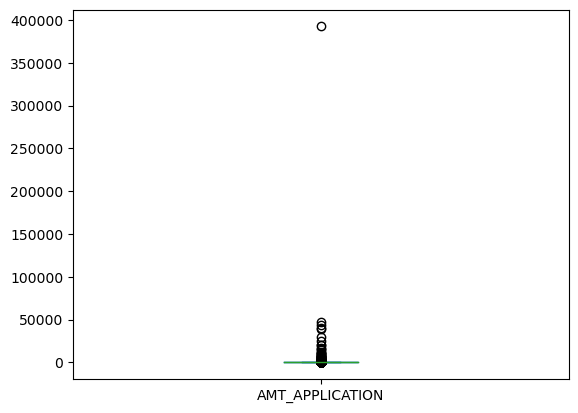

In [296]:
df_prev_ds.AMT_APPLICATION.value_counts().plot.box()

In [297]:
df_prev_ds.AMT_APPLICATION.quantile([.5,.7,.8,.9,.95,.99])

0.50      71046.0
0.70     144769.5
0.80     228937.5
0.90     450000.0
0.95     787500.0
0.99    1350000.0
Name: AMT_APPLICATION, dtype: float64

<AxesSubplot:>

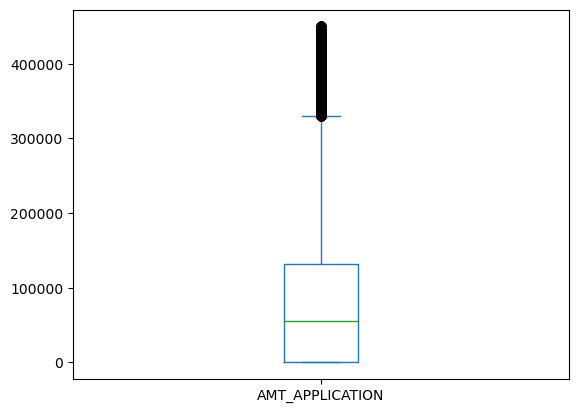

In [298]:
#If we cap to 90 percentile
df_prev_ds[df_prev_ds.AMT_APPLICATION < 450000].AMT_APPLICATION.plot.box()

#### we can cap our outlier to percentile 90, as AMT_APPLICATION is useful data. 

In [299]:
df_prev_ds[df_prev_ds.AMT_APPLICATION < 450000].AMT_APPLICATION.describe()

count    1.466539e+06
mean     8.567685e+04
std      9.347516e+04
min      0.000000e+00
25%      0.000000e+00
50%      5.526000e+04
75%      1.319895e+05
max      4.499955e+05
Name: AMT_APPLICATION, dtype: float64

#### There is lot many missing value in AMT_APPLICATION
- Nearly 25% data are 0

<AxesSubplot:>

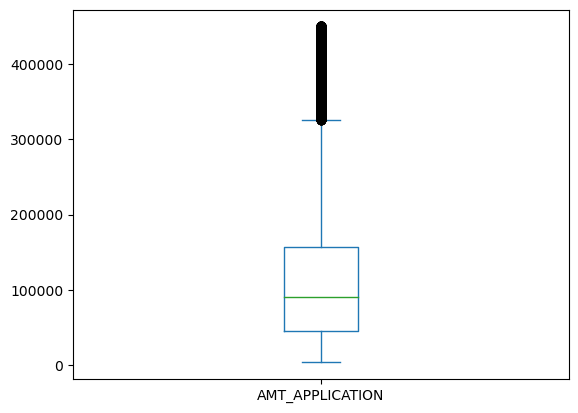

In [300]:
df_prev_ds[(df_prev_ds.AMT_APPLICATION < 450000) & (df_prev_ds.AMT_APPLICATION >0)].AMT_APPLICATION.plot.box()

###  SELLERPLACE_AREA


In [301]:
df_prev_ds.SELLERPLACE_AREA.describe()

count    1.670213e+06
mean     3.139513e+02
std      7.127446e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

<AxesSubplot:>

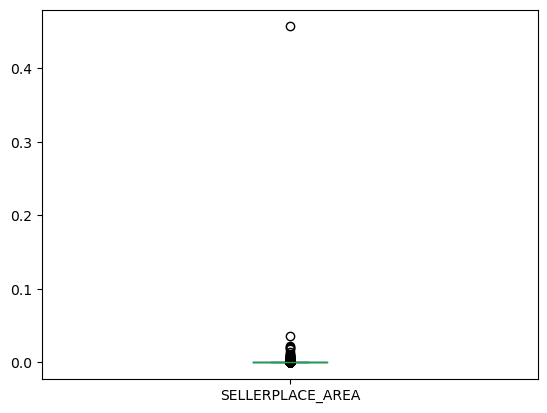

In [302]:
df_prev_ds.SELLERPLACE_AREA.value_counts(normalize= True).plot.box()

<AxesSubplot:>

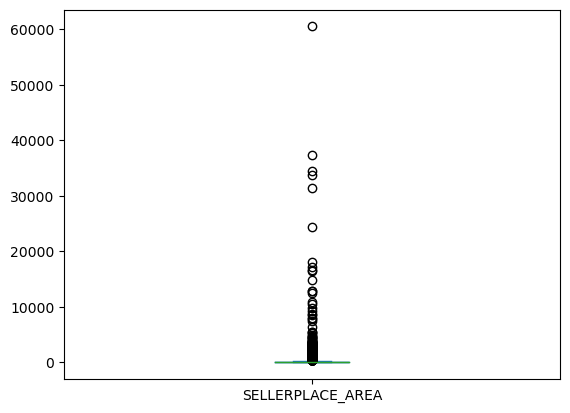

In [303]:
df_prev_ds.SELLERPLACE_AREA[df_prev_ds.SELLERPLACE_AREA >-1].value_counts().plot.box()

In [304]:
IQR = 351 - 25
up_fence = 351 + 1.5*IQR
up_fence

840.0

<AxesSubplot:>

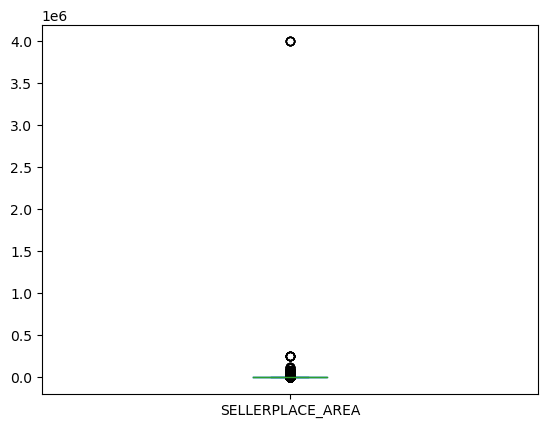

In [305]:
df_prev_ds.SELLERPLACE_AREA[df_prev_ds.SELLERPLACE_AREA >-1].plot.box()

<AxesSubplot:>

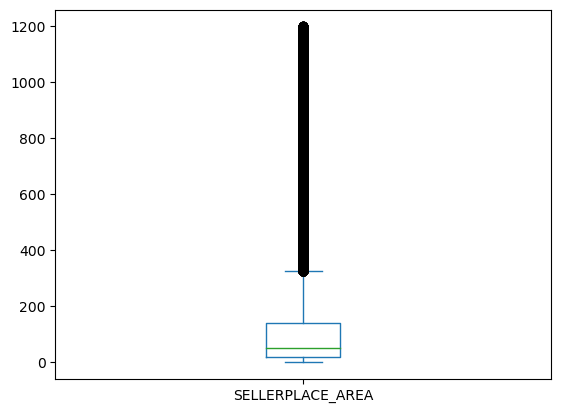

In [306]:
df_prev_ds.SELLERPLACE_AREA[(df_prev_ds.SELLERPLACE_AREA >-1) & (df_prev_ds.SELLERPLACE_AREA < 1200)].plot.box()

#### There is lot many missing value in SELLERPLACE_AREA, which marked as -1. They should not be taken into analysis
- Nearly 25% data are -1



<br></br>
## Merging two data set
<br></br>

In [307]:
final = pd.merge(left=df_ad,right=df_prev_ds, how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_EMPLOYED,YEAR_EMPLOYED_GROUP,AGE,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,<10,25,<30,H,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,<10,45,40-50,R,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,<10,45,40-50,R,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,

In [308]:
final.shape

(1350541, 117)

## Univariate analysis

<AxesSubplot:ylabel='TARGET'>

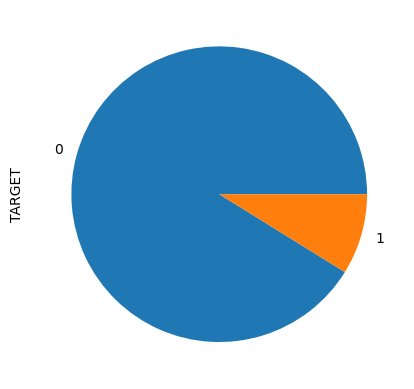

In [309]:
final.TARGET.value_counts(normalize=True).plot.pie()

In [310]:
final.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True)

0.0     0.405111
Cash    0.396467
1.0     0.198422
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

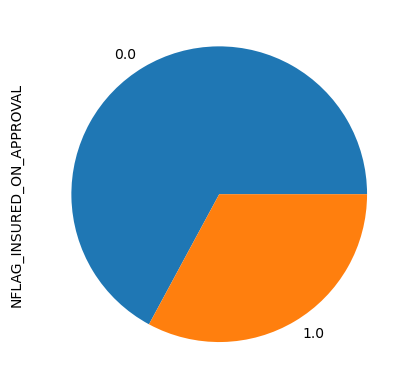

In [311]:
final[final.NFLAG_INSURED_ON_APPROVAL != 'Cash'].NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie()
plt.show()

#### There are 40% missing value marked as Cash.
#### It shows 40% people did not request for insurance

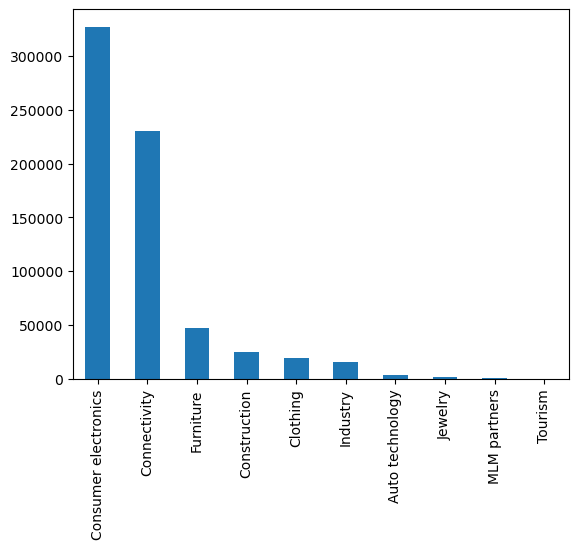

In [312]:
final[final.NAME_SELLER_INDUSTRY != 'XNA'].NAME_SELLER_INDUSTRY.value_counts().plot.bar()
plt.show()

#### most loaner are from consumer electronics and connectivity

In [313]:
final["SELLERPLACE_AREA"].describe()

count    1.350541e+06
mean     3.071868e+02
std      5.128487e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      5.000000e+00
75%      8.600000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

#### No point on analysing SELLERPLACE_AREA, nearly 25% data is missing

In [314]:
final.NAME_YIELD_GROUP.isna().sum()

0

<AxesSubplot:>

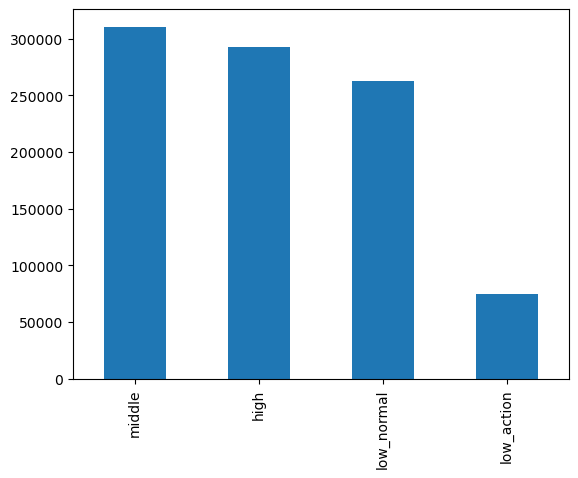

In [315]:
final[final['NAME_YIELD_GROUP'] != 'XNA']['NAME_YIELD_GROUP'].value_counts().plot.bar()

### Middle and high interest rate sold more

### NAME_CONTRACT_STATUS Vs TARGET

In [316]:
contract_status = final['NAME_CONTRACT_STATUS'].unique()
contract_status

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

<AxesSubplot:>

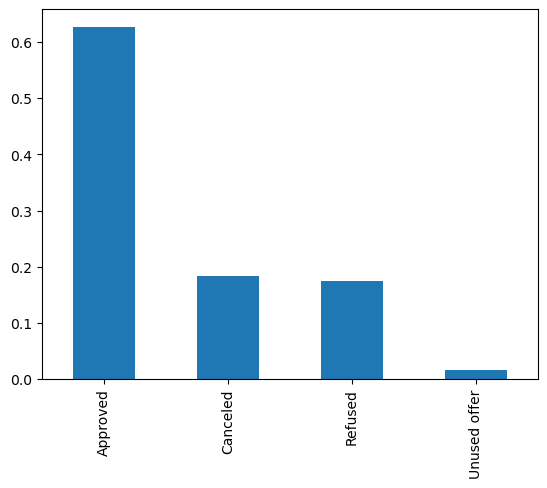

In [317]:
final['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.bar()

Approved 0    0.92263
1    0.07737
Name: TARGET, dtype: float64


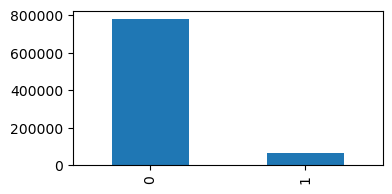

Canceled 0    0.906181
1    0.093819
Name: TARGET, dtype: float64


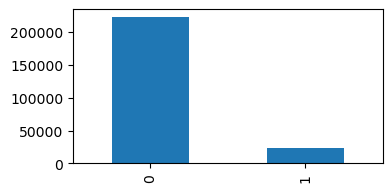

Refused 0    0.877459
1    0.122541
Name: TARGET, dtype: float64


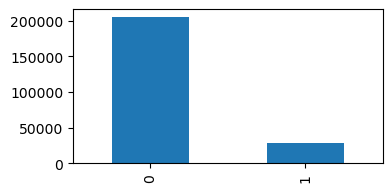

Unused offer 0    0.916284
1    0.083716
Name: TARGET, dtype: float64


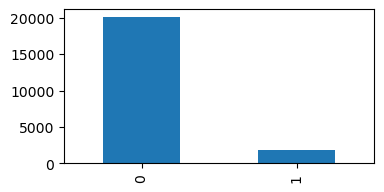

In [318]:
for status in contract_status:
    plt.figure(figsize=[4, 2])
    print(status, final[final['NAME_CONTRACT_STATUS'] == status].TARGET.value_counts(normalize=True))
    final[final['NAME_CONTRACT_STATUS'] == status].TARGET.value_counts().plot.bar()
    plt.show()

7.7 % defaulter from Approved loans, but again there is majority contract status is approved</br>
Simillar trends in other group too. These are lower in number compare to approved. </br>
Major concern why cancelled, refused and unused person given loan current time.


## Bivariate:

Text(0, 0.5, '% per defaulter')

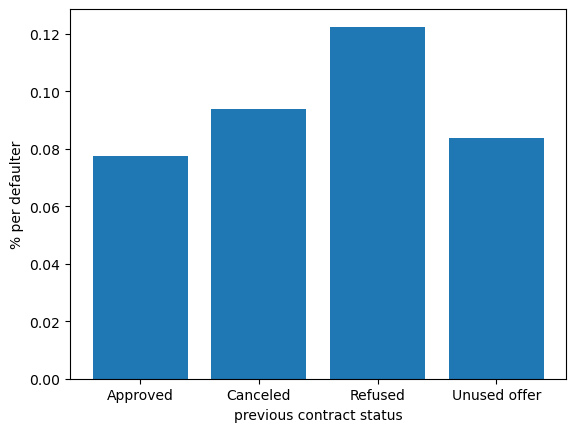

In [319]:
total = final['NAME_CONTRACT_STATUS'].value_counts().sort_index()
target_count = final.groupby('NAME_CONTRACT_STATUS')['TARGET'].sum().sort_index()
plt.bar(x=total.index, height= target_count.values/total.values)
plt.xlabel("previous contract status")
plt.ylabel("% per defaulter")

#### Those who refused earlier has defaulted current time

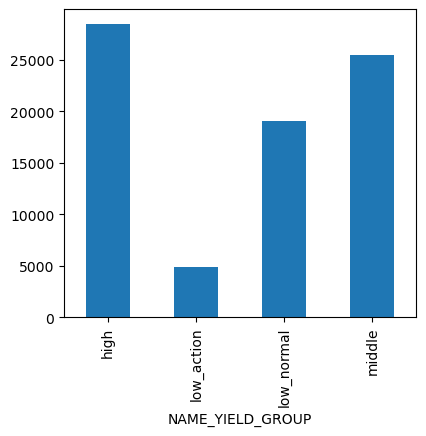

In [320]:
fig = plt.figure(figsize=[10,4])
ax1  = fig.add_subplot(121)
final[final['NAME_YIELD_GROUP'] != 'XNA'].groupby('NAME_YIELD_GROUP')['TARGET'].sum().plot.bar()

plt.show()

#### High and middle yield group are higest defaulter

Text(0, 0.5, '% per defaulter')

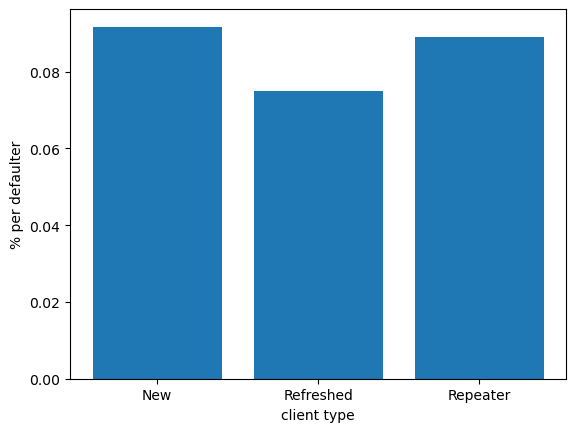

In [321]:
client_type = final[final['NAME_CLIENT_TYPE'] != 'XNA']
total = client_type['NAME_CLIENT_TYPE'].value_counts().sort_index()
target_count = client_type.groupby('NAME_CLIENT_TYPE')['TARGET'].sum().sort_index()
plt.bar(x=total.index, height= target_count.values/total.values)
plt.xlabel("client type")
plt.ylabel("% per defaulter")

### most defaulter are from New or Repeater client type

Text(0, 0.5, '% per defaulter')

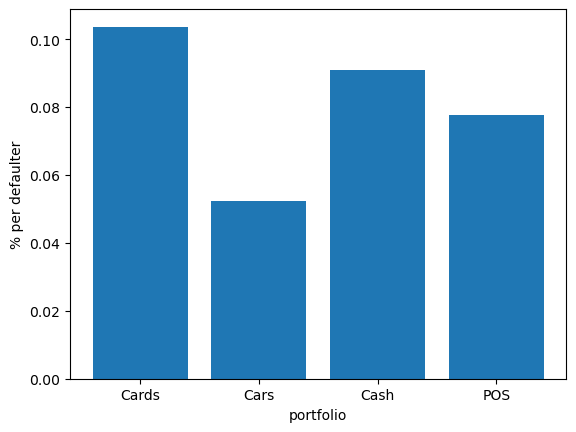

In [322]:
client_type = final[final['NAME_PORTFOLIO'] != 'XNA']
total = client_type['NAME_PORTFOLIO'].value_counts().sort_index()
target_count = client_type.groupby('NAME_PORTFOLIO')['TARGET'].sum().sort_index()
plt.bar(x=total.index, height= target_count.values/total.values)
plt.xlabel("portfolio")
plt.ylabel("% per defaulter")

### Card porfolio hasdefaulter

In [323]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_EMPLOYED,YEAR_EMPLOYED_GROUP,AGE,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,<10,25,<30,H,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,<10,45,40-50,R,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,<10,45,40-50,R,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,

In [324]:
import numpy as np
final["OWN_CAR"]=np.where(final.FLAG_OWN_CAR=="Y", 1, 0)


In [325]:
final.OWN_CAR.value_counts()

0    894998
1    455543
Name: OWN_CAR, dtype: int64

In [326]:
final["OWN_REALTY"]=np.where(final.FLAG_OWN_REALTY=="Y", 1, 0)
final.OWN_REALTY.value_counts()

1    977370
0    373171
Name: OWN_REALTY, dtype: int64

### NAME_INCOME_TYPE VS NAME_CONTRACT_STATUS VS AMT_CREDIT

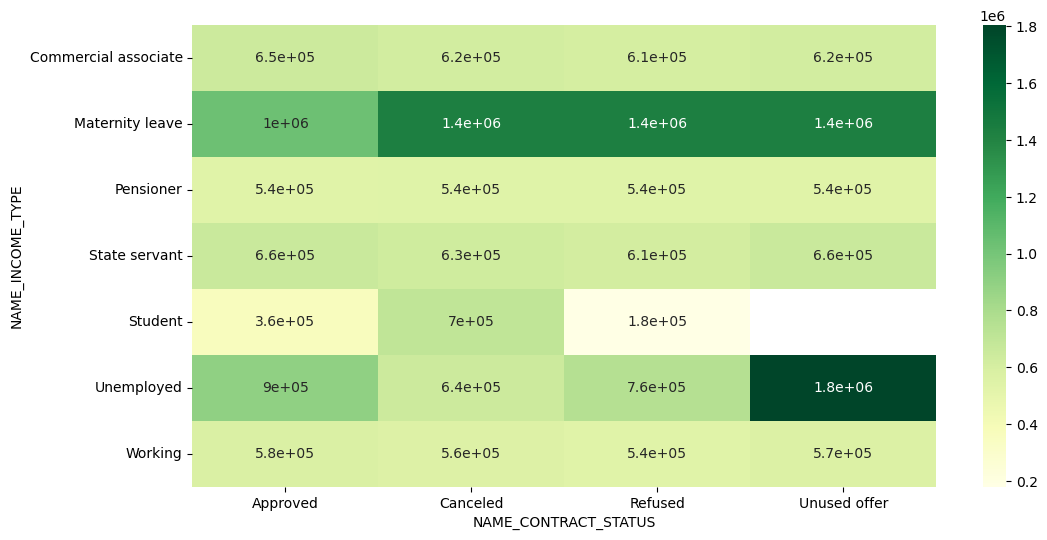

In [327]:
pvt_tbl = final.pivot_table(index='NAME_INCOME_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_CREDIT_x')
plt.figure(figsize=(12,6))
sns.heatmap(pvt_tbl, annot = True, cmap='YlGn')
plt.show()

#### Higher credit given to Unemployed and maternity leave
#### Working category was refused earlier

### NAME_CONTRACT_STATUS VS NAME_INCOME_TYPE VS TARGET

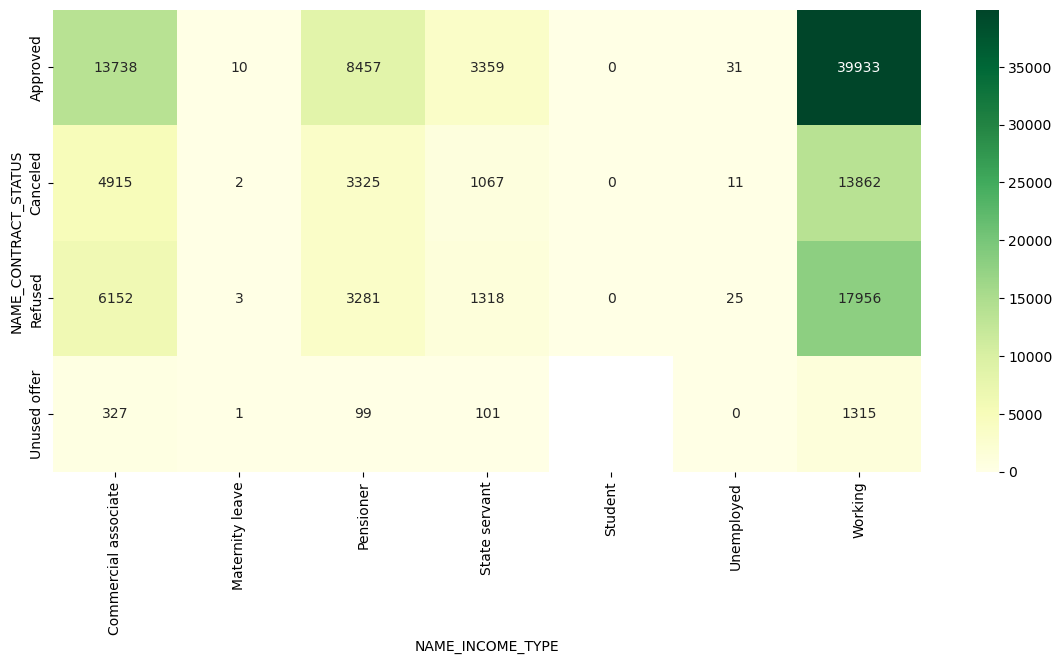

In [328]:
pvt_tbl=final.pivot_table(index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(14,6))
sns.heatmap(pvt_tbl, annot=True, cmap='YlGn', fmt="g")
plt.show()

#### most working  and approved defaulted. Working and refused also defaulted.</br>
#### Those data might be because there are many working category 

In [329]:
final.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.521343
Commercial associate    0.221418
Pensioner               0.190826
State servant           0.066293
Unemployed              0.000091
Student                 0.000017
Maternity leave         0.000012
Name: NAME_INCOME_TYPE, dtype: float64

#### 52% of people are wokring so there is higher number

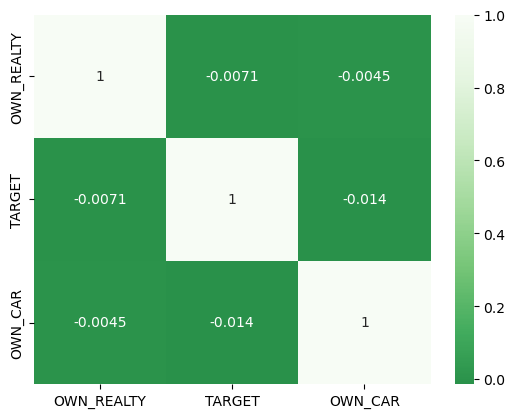

In [330]:
sns.heatmap( final[["OWN_REALTY","TARGET", "OWN_CAR"]].corr(), annot= True, cmap= "Greens_r", center=.3)
plt.show()

#### Owning car and realty has negative relation. those who own car and realty less like to default.

### NAME_CONTRACT_STATUS VS AGE_GROUP VS TARGET

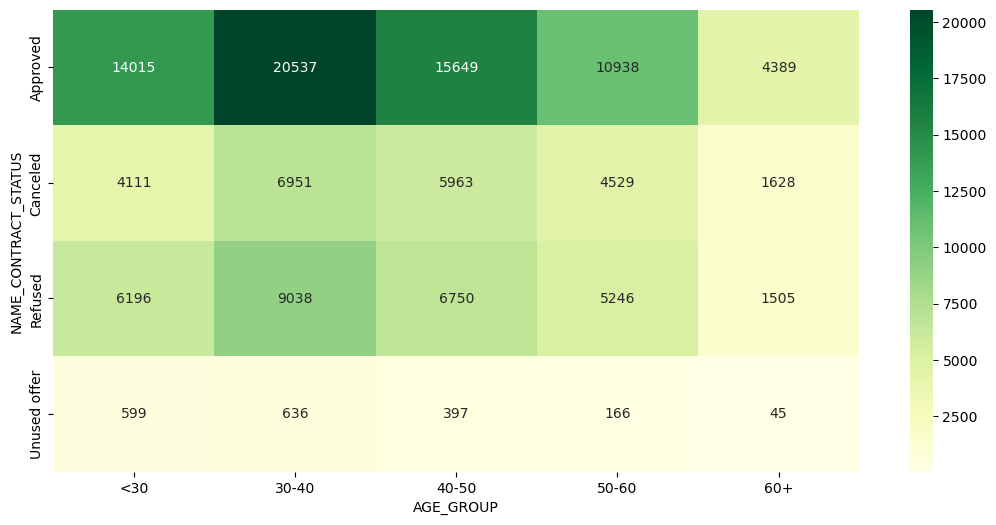

In [331]:
pvt_tbl=final.pivot_table(index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(13,6))
sns.heatmap(pvt_tbl, annot=True,cmap='YlGn', fmt="g")
plt.show()

#### 30-50 group previously approved defaulted most
#### Refused at age 30-40 group defaulted. There might be reason why middle age group refused at first.

In [332]:
app_dft = final[(final['NAME_CONTRACT_STATUS']=="Approved") & (final['TARGET']==1)]

In [333]:
columns=['INCOME_GROUP','OWN_CAR','OWN_REALTY', 'AGE_GROUP','YEAR_EMPLOYED_GROUP', 'CODE_GENDER',"ORGANIZATION_TYPE", 'NAME_INCOME_TYPE','OCCUPATION_TYPE' ]

In [334]:
for col in columns:
    print(app_dft[col].value_counts(normalize=True))
    print('*'*60)

A     0.313285
AA    0.230898
L     0.175609
H     0.169983
R     0.110224
Name: INCOME_GROUP, dtype: float64
************************************************************
0    0.684257
1    0.315743
Name: OWN_CAR, dtype: float64
************************************************************
1    0.706339
0    0.293661
Name: OWN_REALTY, dtype: float64
************************************************************
30-40    0.313408
40-50    0.238814
<30      0.213878
50-60    0.166921
60+      0.066979
Name: AGE_GROUP, dtype: float64
************************************************************
<10      0.887858
10-20    0.088854
20-30    0.019637
30-40    0.003566
40+      0.000085
Name: YEAR_EMPLOYED_GROUP, dtype: float64
************************************************************
F    0.592296
M    0.407704
Name: CODE_GENDER, dtype: float64
************************************************************
Business Entity Type 3    0.245590
Self-employed             0.156773
XNA                

### Summary
- INCOME_GROUP most are average earner
- more defaulter not owning car
- more defaulter not owning realty
- Age group 30-40 most defaulted
- Female defaulted most
- Yeas employed less than 10 defaulted most
- income type working defaulted most
- laborers defaulted most